In [49]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data_15feb.csv')

In [ ]:
#for col in df:
 #   print(col) 
  #  print(df[col].unique())

In [50]:
df_cat = df.drop(columns = ['Unnamed: 0','Immoweb ID','Garden','Prop_orig','Post_code_orig','Sub-type','price/m2'])

In [51]:
for x in ['Bedrooms']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_cat.loc[df[x] < min,x] = np.nan
    df_cat.loc[df[x] > max,x] = np.nan

In [52]:
#df['Bedrooms'].isna().sum
df_cat['Bedrooms'].isnull().sum()
      

275

In [53]:
df_no_out = df_cat[pd.to_numeric(df_cat['Bedrooms'], errors='coerce').notnull()]

In [54]:
df_no_out['Bedrooms'].isnull().sum()

0

In [ ]:
#for col in df_no_out:
 #   print(col) 
  #  print(df[col].unique())

In [61]:
#create X and Y for Linear regression model. X includes all features that are numerical/one hot encoded

features = [ 'Building condition',
 'Kitchen type',
 'Bedrooms',
 'Furnished',
 'Number of frontages',
 'Swimming pool',
 'Surface of the plot',
 'Living area',
 'Property type_APARTMENT',
 'Property type_HOUSE',
  'Post code_1000',
 'Post code_1020',
 'Post code_1030',
 'Post code_1040',
 'Post code_1050',
 'Post code_1060',
 'Post code_1070',
 'Post code_1080',
 'Post code_1081',
 'Post code_1082',
 'Post code_1083',
 'Post code_1090',
 'Post code_1120',
 'Post code_1130',
 'Post code_1140',
 'Post code_1150',
 'Post code_1160',
 'Post code_1170',
 'Post code_1180',
 'Post code_1190',
 'Post code_1200',
 'Post code_1210',
 'Post code_1300',
 'Post code_1301',
 'Post code_1310',
 'Post code_1315',
 'Post code_1320',
 'Post code_1325',
 'Post code_1330',
 'Post code_1331',
 'Post code_1332',
 'Post code_1340',
 'Post code_1341',
 'Post code_1342',
 'Post code_1348',
 'Post code_1350',
 'Post code_1357',
 'Post code_1360',
 'Post code_1367',
 'Post code_1370',
 'Post code_1380',
 'Post code_1390',
 'Post code_1400',
 'Post code_1402',
 'Post code_1404',
 'Post code_1410',
 'Post code_1420',
 'Post code_1421',
 'Post code_1428',
 'Post code_1430',
 'Post code_1435',
 'Post code_1440',
 'Post code_1450',
 'Post code_1457',
 'Post code_1460',
 'Post code_1470',
 'Post code_1474',
 'Post code_1476',
 'Post code_1480',
 'Post code_1490',
 'Post code_1495',
 'Post code_1500',
 'Post code_1501',
 'Post code_1502',
 'Post code_1540',
 'Post code_1541',
 'Post code_1547',
 'Post code_1560',
 'Post code_1570',
 'Post code_1600',
 'Post code_1601',
 'Post code_1602',
 'Post code_1620',
 'Post code_1630',
 'Post code_1640',
 'Post code_1650',
 'Post code_1651',
 'Post code_1652',
 'Post code_1653',
 'Post code_1670',
 'Post code_1700',
 'Post code_1701',
 'Post code_1702',
 'Post code_1703',
 'Post code_1730',
 'Post code_1731',
 'Post code_1740',
 'Post code_1741',
 'Post code_1742',
 'Post code_1745',
 'Post code_1750',
 'Post code_1755',
 'Post code_1760',
 'Post code_1770',
 'Post code_1780',
 'Post code_1785',
 'Post code_1790',
 'Post code_1800',
 'Post code_1820',
 'Post code_1830',
 'Post code_1831',
 'Post code_1840',
 'Post code_1850',
 'Post code_1851',
 'Post code_1852',
 'Post code_1853',
 'Post code_1860',
 'Post code_1861',
 'Post code_1880',
 'Post code_1910',
 'Post code_1930',
 'Post code_1932',
 'Post code_1933',
 'Post code_1950',
 'Post code_1970',
 'Post code_1980',
 'Post code_1981',
 'Post code_1982',
 'Post code_2000',
 'Post code_2018',
 'Post code_2020',
 'Post code_2030',
 'Post code_2040',
 'Post code_2050',
 'Post code_2060',
 'Post code_2070',
 'Post code_2100',
 'Post code_2110',
 'Post code_2140',
 'Post code_2150',
 'Post code_2160',
 'Post code_2170',
 'Post code_2180',
 'Post code_2200',
 'Post code_2220',
 'Post code_2221',
 'Post code_2222',
 'Post code_2230',
 'Post code_2235',
 'Post code_2240',
 'Post code_2243',
 'Post code_2250',
 'Post code_2260',
 'Post code_2270',
 'Post code_2275',
 'Post code_2280',
 'Post code_2288',
 'Post code_2290',
 'Post code_2300',
 'Post code_2310',
 'Post code_2320',
 'Post code_2321',
 'Post code_2322',
 'Post code_2328',
 'Post code_2330',
 'Post code_2340',
 'Post code_2350',
 'Post code_2360',
 'Post code_2370',
 'Post code_2380',
 'Post code_2381',
 'Post code_2382',
 'Post code_2390',
 'Post code_2400',
 'Post code_2430',
 'Post code_2431',
 'Post code_2440',
 'Post code_2450',
 'Post code_2460',
 'Post code_2470',
 'Post code_2480',
 'Post code_2490',
 'Post code_2491',
 'Post code_2500',
 'Post code_2520',
 'Post code_2530',
 'Post code_2540',
 'Post code_2547',
 'Post code_2550',
 'Post code_2560',
 'Post code_2570',
 'Post code_2580',
 'Post code_2590',
 'Post code_2600',
 'Post code_2610',
 'Post code_2620',
 'Post code_2630',
 'Post code_2640',
 'Post code_2650',
 'Post code_2660',
 'Post code_2800',
 'Post code_2812',
 'Post code_2820',
 'Post code_2830',
 'Post code_2840',
 'Post code_2845',
 'Post code_2850',
 'Post code_2860',
 'Post code_2861',
 'Post code_2870',
 'Post code_2880',
 'Post code_2890',
 'Post code_2900',
 'Post code_2910',
 'Post code_2920',
 'Post code_2930',
 'Post code_2940',
 'Post code_2950',
 'Post code_2960',
 'Post code_2970',
 'Post code_2980',
 'Post code_2990',
 'Post code_3000',
 'Post code_3001',
 'Post code_3010',
 'Post code_3012',
 'Post code_3018',
 'Post code_3020',
 'Post code_3040',
 'Post code_3051',
 'Post code_3053',
 'Post code_3060',
 'Post code_3070',
 'Post code_3071',
 'Post code_3078',
 'Post code_3080',
 'Post code_3090',
 'Post code_3110',
 'Post code_3111',
 'Post code_3118',
 'Post code_3120',
 'Post code_3128',
 'Post code_3130',
 'Post code_3140',
 'Post code_3150',
 'Post code_3190',
 'Post code_3191',
 'Post code_3200',
 'Post code_3201',
 'Post code_3202',
 'Post code_3210',
 'Post code_3212',
 'Post code_3220',
 'Post code_3221',
 'Post code_3270',
 'Post code_3271',
 'Post code_3290',
 'Post code_3294',
 'Post code_3300',
 'Post code_3320',
 'Post code_3321',
 'Post code_3350',
 'Post code_3360',
 'Post code_3370',
 'Post code_3380',
 'Post code_3390',
 'Post code_3400',
 'Post code_3440',
 'Post code_3450',
 'Post code_3454',
 'Post code_3460',
 'Post code_3470',
 'Post code_3473',
 'Post code_3500',
 'Post code_3511',
 'Post code_3512',
 'Post code_3520',
 'Post code_3530',
 'Post code_3540',
 'Post code_3545',
 'Post code_3550',
 'Post code_3560',
 'Post code_3570',
 'Post code_3580',
 'Post code_3581',
 'Post code_3582',
 'Post code_3583',
 'Post code_3590',
 'Post code_3600',
 'Post code_3620',
 'Post code_3621',
 'Post code_3630',
 'Post code_3640',
 'Post code_3650',
 'Post code_3660',
 'Post code_3670',
 'Post code_3680',
 'Post code_3690',
 'Post code_3700',
 'Post code_3720',
 'Post code_3730',
 'Post code_3740',
 'Post code_3770',
 'Post code_3791',
 'Post code_3798',
 'Post code_3800',
 'Post code_3806',
 'Post code_3830',
 'Post code_3840',
 'Post code_3870',
 'Post code_3890',
 'Post code_3891',
 'Post code_3900',
 'Post code_3910',
 'Post code_3920',
 'Post code_3930',
 'Post code_3940',
 'Post code_3941',
 'Post code_3945',
 'Post code_3950',
 'Post code_3960',
 'Post code_3970',
 'Post code_3971',
 'Post code_3980',
 'Post code_3990',
 'Post code_4000',
 'Post code_4020',
 'Post code_4030',
 'Post code_4031',
 'Post code_4032',
 'Post code_4040',
 'Post code_4041',
 'Post code_4050',
 'Post code_4051',
 'Post code_4052',
 'Post code_4053',
 'Post code_4100',
 'Post code_4101',
 'Post code_4102',
 'Post code_4121',
 'Post code_4122',
 'Post code_4130',
 'Post code_4140',
 'Post code_4141',
 'Post code_4160',
 'Post code_4180',
 'Post code_4190',
 'Post code_4210',
 'Post code_4217',
 'Post code_4218',
 'Post code_4250',
 'Post code_4257',
 'Post code_4260',
 'Post code_4280',
 'Post code_4287',
 'Post code_4300',
 'Post code_4317',
 'Post code_4340',
 'Post code_4342',
 'Post code_4347',
 'Post code_4350',
 'Post code_4357',
 'Post code_4360',
 'Post code_4367',
 'Post code_4400',
 'Post code_4420',
 'Post code_4430',
 'Post code_4431',
 'Post code_4432',
 'Post code_4450',
 'Post code_4451',
 'Post code_4452',
 'Post code_4460',
 'Post code_4470',
 'Post code_4480',
 'Post code_4500',
 'Post code_4520',
 'Post code_4530',
 'Post code_4537',
 'Post code_4540',
 'Post code_4550',
 'Post code_4557',
 'Post code_4560',
 'Post code_4577',
 'Post code_4590',
 'Post code_4600',
 'Post code_4602',
 'Post code_4607',
 'Post code_4608',
 'Post code_4610',
 'Post code_4620',
 'Post code_4621',
 'Post code_4630',
 'Post code_4633',
 'Post code_4650',
 'Post code_4651',
 'Post code_4652',
 'Post code_4654',
 'Post code_4671',
 'Post code_4672',
 'Post code_4680',
 'Post code_4681',
 'Post code_4682',
 'Post code_4683',
 'Post code_4684',
 'Post code_4690',
 'Post code_4700',
 'Post code_4710',
 'Post code_4720',
 'Post code_4730',
 'Post code_4731',
 'Post code_4750',
 'Post code_4770',
 'Post code_4780',
 'Post code_4790',
 'Post code_4800',
 'Post code_4801',
 'Post code_4802',
 'Post code_4820',
 'Post code_4821',
 'Post code_4830',
 'Post code_4837',
 'Post code_4840',
 'Post code_4841',
 'Post code_4845',
 'Post code_4850',
 'Post code_4851',
 'Post code_4852',
 'Post code_4860',
 'Post code_4870',
 'Post code_4877',
 'Post code_4880',
 'Post code_4890',
 'Post code_4900',
 'Post code_4910',
 'Post code_4920',
 'Post code_4950',
 'Post code_4960',
 'Post code_4970',
 'Post code_4980',
 'Post code_4987',
 'Post code_4990',
 'Post code_5000',
 'Post code_5001',
 'Post code_5002',
 'Post code_5004',
 'Post code_5020',
 'Post code_5022',
 'Post code_5030',
 'Post code_5031',
 'Post code_5032',
 'Post code_5060',
 'Post code_5070',
 'Post code_5081',
 'Post code_5100',
 'Post code_5101',
 'Post code_5140',
 'Post code_5150',
 'Post code_5170',
 'Post code_5190',
 'Post code_5300',
 'Post code_5310',
 'Post code_5330',
 'Post code_5340',
 'Post code_5350',
 'Post code_5352',
 'Post code_5354',
 'Post code_5360',
 'Post code_5364',
 'Post code_5370',
 'Post code_5374',
 'Post code_5377',
 'Post code_5380',
 'Post code_5500',
 'Post code_5503',
 'Post code_5520',
 'Post code_5522',
 'Post code_5530',
 'Post code_5537',
 'Post code_5540',
 'Post code_5541',
 'Post code_5550',
 'Post code_5555',
 'Post code_5560',
 'Post code_5564',
 'Post code_5574',
 'Post code_5575',
 'Post code_5580',
 'Post code_5590',
 'Post code_5600',
 'Post code_5620',
 'Post code_5621',
 'Post code_5630',
 'Post code_5640',
 'Post code_5646',
 'Post code_5650',
 'Post code_5651',
 'Post code_5660',
 'Post code_5670',
 'Post code_5680',
 'Post code_6000',
 'Post code_6001',
 'Post code_6010',
 'Post code_6030',
 'Post code_6031',
 'Post code_6032',
 'Post code_6040',
 'Post code_6041',
 'Post code_6042',
 'Post code_6043',
 'Post code_6044',
 'Post code_6060',
 'Post code_6061',
 'Post code_6110',
 'Post code_6111',
 'Post code_6120',
 'Post code_6140',
 'Post code_6141',
 'Post code_6150',
 'Post code_6180',
 'Post code_6181',
 'Post code_6182',
 'Post code_6183',
 'Post code_6200',
 'Post code_6210',
 'Post code_6220',
 'Post code_6223',
 'Post code_6224',
 'Post code_6230',
 'Post code_6238',
 'Post code_6240',
 'Post code_6250',
 'Post code_6280',
 'Post code_6440',
 'Post code_6441',
 'Post code_6460',
 'Post code_6461',
 'Post code_6470',
 'Post code_6500',
 'Post code_6530',
 'Post code_6534',
 'Post code_6540',
 'Post code_6560',
 'Post code_6567',
 'Post code_6590',
 'Post code_6593',
 'Post code_6596',
 'Post code_6600',
 'Post code_6630',
 'Post code_6637',
 'Post code_6640',
 'Post code_6660',
 'Post code_6661',
 'Post code_6662',
 'Post code_6666',
 'Post code_6671',
 'Post code_6673',
 'Post code_6674',
 'Post code_6680',
 'Post code_6681',
 'Post code_6686',
 'Post code_6690',
 'Post code_6698',
 'Post code_6700',
 'Post code_6717',
 'Post code_6723',
 'Post code_6724',
 'Post code_6730',
 'Post code_6740',
 'Post code_6750',
 'Post code_6760',
 'Post code_6762',
 'Post code_6767',
 'Post code_6769',
 'Post code_6780',
 'Post code_6790',
 'Post code_6792',
 'Post code_6800',
 'Post code_6812',
 'Post code_6820',
 'Post code_6830',
 'Post code_6833',
 'Post code_6840',
 'Post code_6850',
 'Post code_6853',
 'Post code_6856',
 'Post code_6860',
 'Post code_6870',
 'Post code_6880',
 'Post code_6887',
 'Post code_6890',
 'Post code_6900',
 'Post code_6927',
 'Post code_6940',
 'Post code_6941',
 'Post code_6950',
 'Post code_6951',
 'Post code_6953',
 'Post code_6960',
 'Post code_6970',
 'Post code_6980',
 'Post code_6983',
 'Post code_6987',
 'Post code_6990',
 'Post code_6997',
 'Post code_7000',
 'Post code_7011',
 'Post code_7012',
 'Post code_7020',
 'Post code_7021',
 'Post code_7022',
 'Post code_7024',
 'Post code_7032',
 'Post code_7033',
 'Post code_7040',
 'Post code_7041',
 'Post code_7050',
 'Post code_7060',
 'Post code_7061',
 'Post code_7063',
 'Post code_7070',
 'Post code_7080',
 'Post code_7090',
 'Post code_7100',
 'Post code_7110',
 'Post code_7120',
 'Post code_7130',
 'Post code_7133',
 'Post code_7134',
 'Post code_7140',
 'Post code_7141',
 'Post code_7160',
 'Post code_7170',
 'Post code_7180',
 'Post code_7181',
 'Post code_7190',
 'Post code_7300',
 'Post code_7301',
 'Post code_7320',
 'Post code_7321',
 'Post code_7322',
 'Post code_7330',
 'Post code_7331',
 'Post code_7332',
 'Post code_7333',
 'Post code_7334',
 'Post code_7340',
 'Post code_7350',
 'Post code_7370',
 'Post code_7380',
 'Post code_7387',
 'Post code_7390',
 'Post code_7500',
 'Post code_7502',
 'Post code_7504',
 'Post code_7520',
 'Post code_7522',
 'Post code_7532',
 'Post code_7534',
 'Post code_7540',
 'Post code_7542',
 'Post code_7543',
 'Post code_7600',
 'Post code_7603',
 'Post code_7604',
 'Post code_7620',
 'Post code_7621',
 'Post code_7624',
 'Post code_7640',
 'Post code_7641',
 'Post code_7700',
 'Post code_7711',
 'Post code_7712',
 'Post code_7730',
 'Post code_7740',
 'Post code_7750',
 'Post code_7760',
 'Post code_7780',
 'Post code_7783',
 'Post code_7784',
 'Post code_7800',
 'Post code_7804',
 'Post code_7811',
 'Post code_7812',
 'Post code_7822',
 'Post code_7830',
 'Post code_7850',
 'Post code_7860',
 'Post code_7861',
 'Post code_7863',
 'Post code_7864',
 'Post code_7866',
 'Post code_7870',
 'Post code_7880',
 'Post code_7890',
 'Post code_7900',
 'Post code_7903',
 'Post code_7911',
 'Post code_7912',
 'Post code_7940',
 'Post code_7950',
 'Post code_7951',
 'Post code_7970',
 'Post code_7971',
 'Post code_7973',
 'Post code_8000',
 'Post code_8020',
 'Post code_8200',
 'Post code_8210',
 'Post code_8211',
 'Post code_8300',
 'Post code_8301',
 'Post code_8310',
 'Post code_8340',
 'Post code_8370',
 'Post code_8377',
 'Post code_8380',
 'Post code_8400',
 'Post code_8420',
 'Post code_8430',
 'Post code_8432',
 'Post code_8433',
 'Post code_8434',
 'Post code_8450',
 'Post code_8460',
 'Post code_8470',
 'Post code_8480',
 'Post code_8490',
 'Post code_8500',
 'Post code_8501',
 'Post code_8510',
 'Post code_8511',
 'Post code_8520',
 'Post code_8530',
 'Post code_8531',
 'Post code_8540',
 'Post code_8550',
 'Post code_8551',
 'Post code_8552',
 'Post code_8554',
 'Post code_8560',
 'Post code_8570',
 'Post code_8572',
 'Post code_8580',
 'Post code_8581',
 'Post code_8587',
 'Post code_8600',
 'Post code_8610',
 'Post code_8620',
 'Post code_8630',
 'Post code_8640',
 'Post code_8647',
 'Post code_8650',
 'Post code_8660',
 'Post code_8670',
 'Post code_8680',
 'Post code_8700',
 'Post code_8710',
 'Post code_8720',
 'Post code_8730',
 'Post code_8740',
 'Post code_8750',
 'Post code_8755',
 'Post code_8760',
 'Post code_8770',
 'Post code_8780',
 'Post code_8790',
 'Post code_8791',
 'Post code_8792',
 'Post code_8800',
 'Post code_8810',
 'Post code_8820',
 'Post code_8830',
 'Post code_8840',
 'Post code_8850',
 'Post code_8860',
 'Post code_8870',
 'Post code_8880',
 'Post code_8890',
 'Post code_8900',
 'Post code_8902',
 'Post code_8904',
 'Post code_8906',
 'Post code_8920',
 'Post code_8930',
 'Post code_8940',
 'Post code_8970',
 'Post code_8972',
 'Post code_8980',
 'Post code_9000',
 'Post code_9030',
 'Post code_9031',
 'Post code_9032',
 'Post code_9040',
 'Post code_9041',
 'Post code_9050',
 'Post code_9051',
 'Post code_9052',
 'Post code_9060',
 'Post code_9070',
 'Post code_9080',
 'Post code_9090',
 'Post code_9100',
 'Post code_9111',
 'Post code_9120',
 'Post code_9130',
 'Post code_9140',
 'Post code_9150',
 'Post code_9160',
 'Post code_9170',
 'Post code_9185',
 'Post code_9190',
 'Post code_9200',
 'Post code_9220',
 'Post code_9230',
 'Post code_9240',
 'Post code_9250',
 'Post code_9255',
 'Post code_9260',
 'Post code_9280',
 'Post code_9290',
 'Post code_9300',
 'Post code_9308',
 'Post code_9310',
 'Post code_9320',
 'Post code_9340',
 'Post code_9400',
 'Post code_9401',
 'Post code_9402',
 'Post code_9406',
 'Post code_9420',
 'Post code_9450',
 'Post code_9451',
 'Post code_9470',
 'Post code_9472',
 'Post code_9473',
 'Post code_9500',
 'Post code_9506',
 'Post code_9520',
 'Post code_9550',
 'Post code_9570',
 'Post code_9600',
 'Post code_9620',
 'Post code_9630',
 'Post code_9660',
 'Post code_9667',
 'Post code_9688',
 'Post code_9690',
 'Post code_9700',
 'Post code_9750',
 'Post code_9770',
 'Post code_9790',
 'Post code_9800',
 'Post code_9810',
 'Post code_9820',
 'Post code_9830',
 'Post code_9850',
 'Post code_9860',
 'Post code_9870',
 'Post code_9880',
 'Post code_9890',
 'Post code_9900',
 'Post code_9910',
 'Post code_9920',
 'Post code_9930',
 'Post code_9940',
 'Post code_9950',
 'Post code_9960',
 'Post code_9968',
 'Post code_9971',
 'Post code_9981',
 'Post code_9982',
 'Post code_9988',
 'Post code_9990',
 'Post code_9991',
 'Post code_9992',
 'property sub-type_BUNGALOW',
 'property sub-type_CASTLE',
 'property sub-type_CHALET',
 'property sub-type_COUNTRY_COTTAGE',
 'property sub-type_DUPLEX',
 'property sub-type_EXCEPTIONAL_PROPERTY',
 'property sub-type_FARMHOUSE',
 'property sub-type_FLAT_STUDIO',
 'property sub-type_GROUND_FLOOR',
 'property sub-type_KOT',
 'property sub-type_LOFT',
 'property sub-type_MANOR_HOUSE',
 'property sub-type_MANSION',
 'property sub-type_MIXED_USE_BUILDING',
 'property sub-type_PENTHOUSE',
 'property sub-type_SERVICE_FLAT',
 'property sub-type_TOWN_HOUSE',
 'property sub-type_TRIPLEX',
 'property sub-type_VILLA',
 'Terrace_Combined',
 'garden_label',]
target = 'Price'



X = df_no_out[features].values.reshape(-1, len(features))
Y = df_no_out[target].values

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)
X_test
y_test
array = train_test_split(X, Y)

In [83]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X_train, y_train)

In [84]:
regressor.score(X_train, y_train)

0.6382448308848624

In [85]:
y_predict = regressor.predict(X_test)

In [86]:
regressor.predict(X_train)

array([ 302217.81322865,  634413.56167647,  434190.92623992, ...,
        778894.4280822 , 1109713.86570797,  654272.83177991])

In [90]:
regressor.score(X_test, y_test)

0.5265731322887004

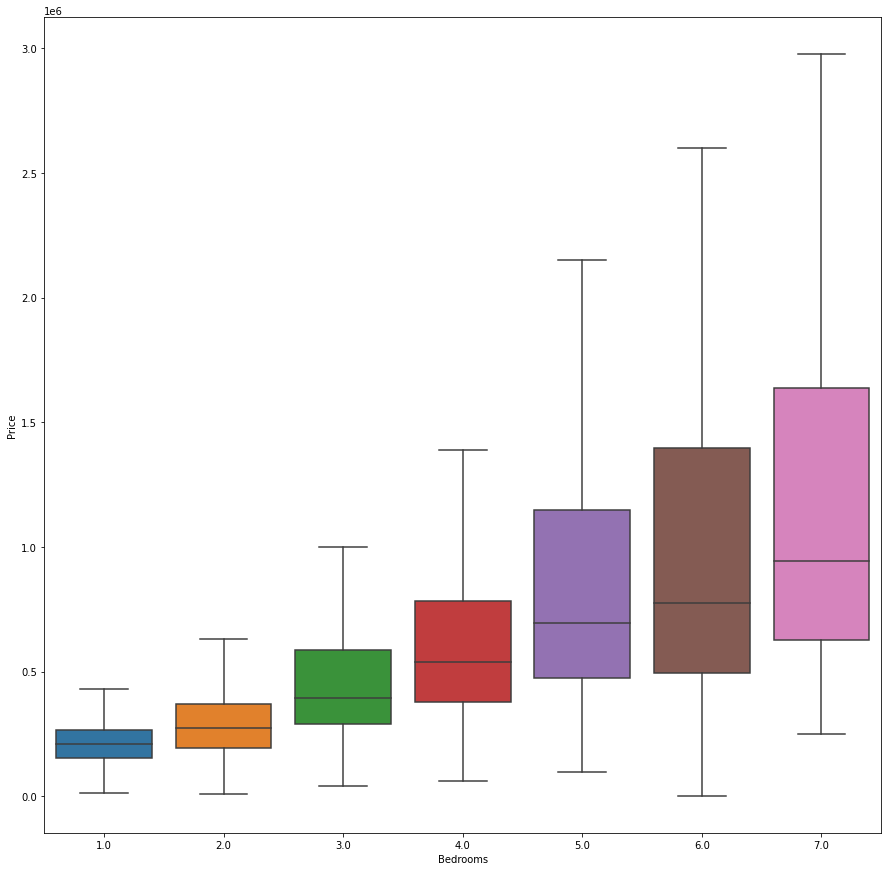

In [93]:
plt.figure(figsize=(15,15))
ax = sns.boxplot(x="Bedrooms", y="Price", data=df_no_out, showfliers = False)

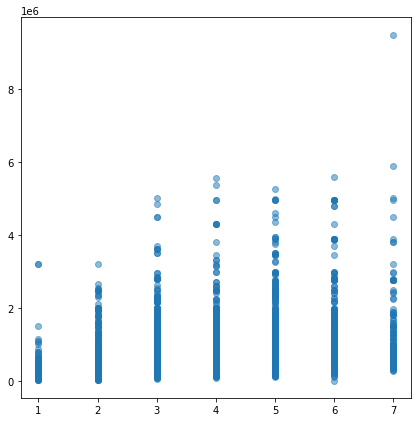

In [40]:
plt.figure(figsize=(7,7))
plt.scatter(x=df_no_out["Bedrooms"], y=df_no_out["Price"], alpha=0.5)
plt.show()

<AxesSubplot:xlabel='Bedrooms', ylabel='Price'>

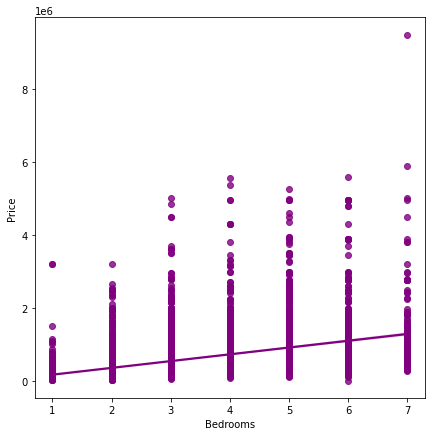

In [41]:
plt.figure(figsize=(7,7))
sns.regplot(x=df_no_out["Bedrooms"], y=df_no_out["Price"], color = "purple")

In [42]:
df_no_out.corrwith(df_no_out["Price"]).sort_values(ascending=True)


Property type_APARTMENT          -0.266664
property sub-type_FLAT_STUDIO    -0.185443
property sub-type_GROUND_FLOOR   -0.135093
property sub-type_SERVICE_FLAT   -0.103576
property sub-type_DUPLEX         -0.085710
                                    ...   
Post code_5520                         NaN
Post code_5522                         NaN
Post code_6673                         NaN
Post code_6767                         NaN
Post code_8906                         NaN
Length: 899, dtype: float64

Text(0.5, 1.0, 'Approach C')

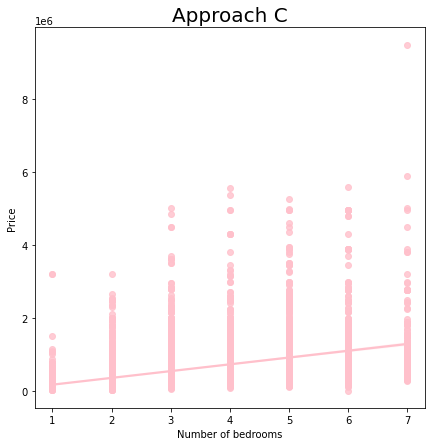

In [91]:
plt.figure(figsize=(7,7))
p= sns.regplot(x=df_no_out["Bedrooms"], y=df_no_out["Price"], color = "pink")
p.set_xlabel("Number of bedrooms")
p.set_ylabel("Price")
p.set_title("Approach C", fontsize = 20)

Text(0, 0.5, 'Price')

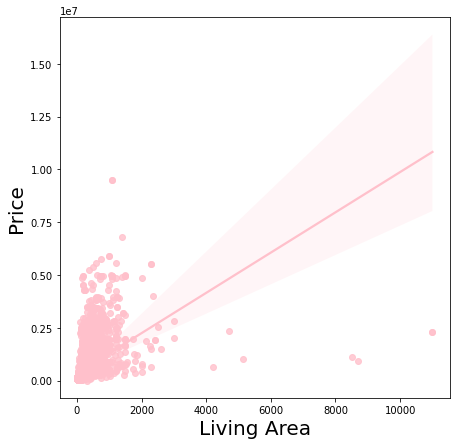

In [47]:
plt.figure(figsize=(7,7))
p= sns.regplot(x=df["Living area"], y=df["Price"], color = "pink")
p.set_xlabel("Living Area")
p.set_ylabel("Price")
p.set_title("Approach C", fontsize = 20)